## Importing the data

In [40]:
# Import pandas into the environment
import pandas as pd

# Upload the data
from google.colab import files
uploaded = files.upload() 

Saving marketing.csv to marketing (1).csv


In [41]:
# Import the data
marketing = pd.read_csv('marketing.csv')

# Look at the first few rows of the data (best practice after importing data)
marketing.head(10)

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True
5,a100000034,1/1/18,House Ads,personalization,True,German,German,45-55 years,1/1/18,NaN,House Ads,True
6,a100000035,1/1/18,House Ads,personalization,True,English,English,55+ years,1/1/18,NaN,House Ads,True
7,a100000036,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
8,a100000037,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
9,a100000038,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True


## Getting to know the data

In [42]:
# Look at data types and summary statistics
marketing.info()
marketing.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB


,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
count,10037,10021,10022,10037,10022,10037,10037,10037,1856,577,1856,1856
unique,7309,31,5,2,2,4,4,7,31,115,5,2
top,a100000882,1/15/18,House Ads,control,False,English,English,19-24 years,1/16/18,4/2/18,Instagram,True
freq,12,789,4733,5091,8946,9793,9275,1682,163,15,600,1279


Findings: 
1. <code>'date_served'</code>, <code>'date_subscribed'</code>, <code>'date_canceled'</code> is stored as object instead of datetime
2. <code>'converted'</code> and <code>is_retained'</code> is stored as object instead of bool
3. contains null = <code>date_served</code>, <code>marketing_channel</code>, <code>converted</code>, other than that the null makes sense

Ways to correct:
1. convert with <code>pd.to_datetime()</code>
2. convert with <code>.astype('bool')</code>, but then <code>nan</code> will be converted to <code>True</code> since boolean doesn't have <code>nan</code>, it's either <code>True</code> or <code>False</code>.
3. <code>.dropna()</code> while analyzing

In [43]:
# Looking at the unique values and its count
list = ['marketing_channel','variant','converted','language_displayed',
        'language_preferred','age_group','subscribing_channel','is_retained']

for column in list:
  if marketing[column].dtype == object:
    print(str(column) + ':' + str(marketing[column].unique()))
    print(marketing[column].value_counts())
    print('________________________________________________')

marketing_channel:['House Ads' 'Push' 'Facebook' 'Instagram' 'Email' nan]
House Ads    4733
Instagram    1871
Facebook     1860
Push          993
Email         565
Name: marketing_channel, dtype: int64
________________________________________________
variant:['personalization' 'control']
control            5091
personalization    4946
Name: variant, dtype: int64
________________________________________________
converted:[True False nan]
False    8946
True     1076
Name: converted, dtype: int64
________________________________________________
language_displayed:['English' 'German' 'Arabic' 'Spanish']
English    9793
Spanish     136
German       81
Arabic       27
Name: language_displayed, dtype: int64
________________________________________________
language_preferred:['English' 'German' 'Arabic' 'Spanish']
English    9275
Spanish     450
German      167
Arabic      145
Name: language_preferred, dtype: int64
________________________________________________
age_group:['0-18 years' '19-24


Where possibly to find insights:

*   language factor where language displayed = language preferred -> result based on language
*   result by channel
* outcome by age group and channel
*  A/B testing result by channel and or age group





## Updating Data

In [44]:
# Changing dates column to its correct type
dates = ['date_served','date_subscribed','date_canceled']

for date in dates:
  if marketing[date].dtype == object:
    marketing[date] = pd.to_datetime(marketing[date])

# Add new column to see if the display matches preferred language
# Yes if match, No if not

# Import numpy
import numpy as np

# Add new column
marketing['is_correct_lang']=np.where(marketing['language_displayed']==
                                      marketing['language_preferred'], 'Yes', 'No')

# Add new column for the day of the week (DOW) of the date_served
marketing['DoW_served'] = marketing['date_served'].dt.dayofweek

## Initial Exploratory Analysis

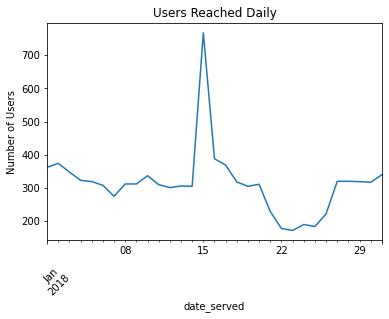

In [45]:
# Looking at daily marketing reaches
daily_users = marketing.groupby('date_served')['user_id'].nunique()

# Plot the users reached daily 
import matplotlib.pyplot as plt

daily_users.plot()
plt.title('Users Reached Daily')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

There was peak in around Jan 15th and drop in the daily users reached around January 20th-28th:

In [46]:
# Check
daily_users.loc['2018-01-14':'2018-01-17']

date_served
2018-01-14    305
2018-01-15    767
2018-01-16    388
2018-01-17    369
Name: user_id, dtype: int64

In [47]:
# Check
daily_users.loc['2018-01-20':'2018-01-28']

date_served
2018-01-20    311
2018-01-21    229
2018-01-22    178
2018-01-23    172
2018-01-24    190
2018-01-25    184
2018-01-26    222
2018-01-27    320
2018-01-28    320
Name: user_id, dtype: int64

Text(0.5, 1.0, 'Reaches by day of the week \n')

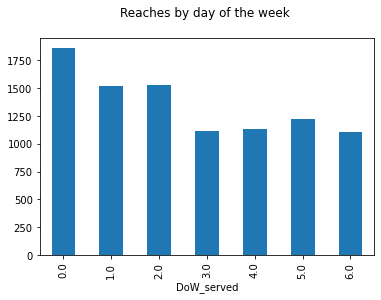

In [48]:
# Plotting users reached by day of th week
dow_users = marketing.groupby('DoW_served')['user_id'].nunique()
dow_users.plot(kind='bar')
plt.title('Reaches by day of the week \n')

Findings :
* spike at 15 Januari 2018
* reaches drop at Jan 21-26th 
* seasonality based on the day of the week make sense

In [49]:
# Calculating overall conversion rate

# Calculate the number of people company marketed to
total = marketing['user_id'].nunique()

# Calculate the number of people who subscribed
subscribers = marketing[marketing['converted'] == True]['user_id'].nunique()

# Calculate the conversion rate
conv_rate = subscribers/total
print('Overall conversion rate is', round(conv_rate*100, 2), "%")

Overall conversion rate is 13.89 %


In [50]:
# Calculating overall retention rate

# Calculate the number of people who remained subscribed
retained = marketing[marketing['is_retained']== True]['user_id'].nunique()

# Calculate the retention rate
retention_rate = retained/subscribers
print('Overall retention rate is', round(retention_rate*100, 2), "%")

Overall retention rate is 66.8 %


### Automating function for analysis



In [51]:
# Automating conversion rate

def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe['converted']==True].groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()  
    
    # Conversion rate 
    conversion_rate = column_conv/column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

In [52]:
# Automating conversion rate plotting for each column
def plotting(df):
  for column in df:
      plt.plot(df.index,df[column]) 
      plt.title('Daily ' + str(column) + ' Conversion Rate \n')
      plt.ylabel('Conversion Rate')
      plt.xlabel('Date Served')
      plt.xticks(rotation=45)
      plt.show()

### Campaign results analysis based on ads language

to see if ads were sent out in the preferred languages

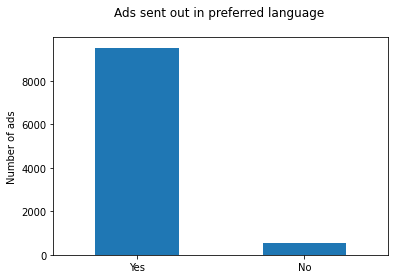

In [53]:
# Plotting the total language matching or not
marketing['is_correct_lang'].value_counts().plot(kind='bar')
plt.title('Ads sent out in preferred language \n')
plt.xticks(rotation=0)
plt.ylabel('Number of ads')
plt.show()

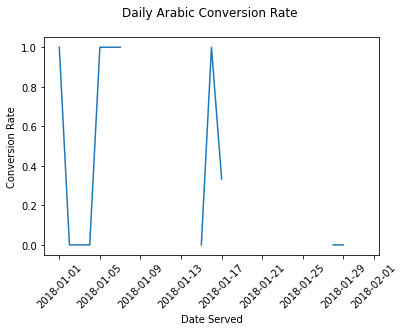

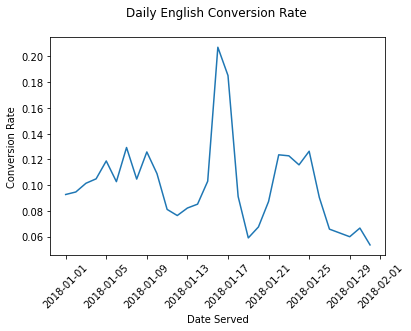

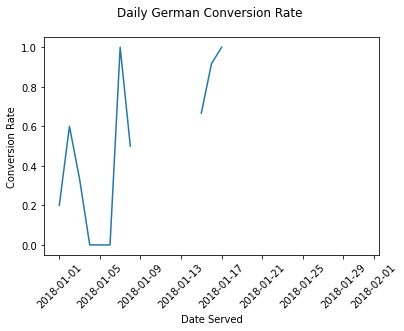

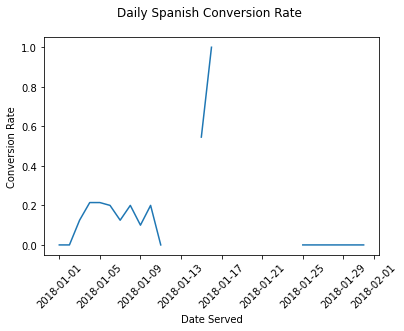

In [54]:
# Plotting conversion rate based on language displayed on ads for each language
lang_conv = conversion_rate(marketing, ['date_served','language_displayed'])
lang_conv_df = pd.DataFrame(lang_conv.unstack(level=1))
plotting(lang_conv_df)

Findings:
* There are several days where no campaign was sent out in language other than english

### Campaign results based on marketing_channel

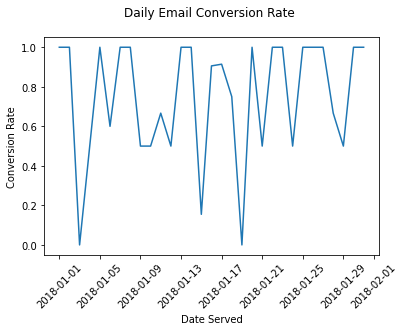

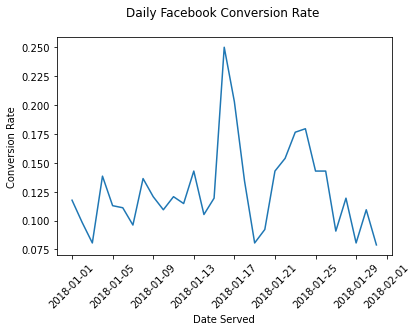

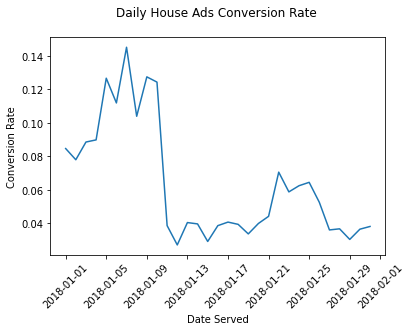

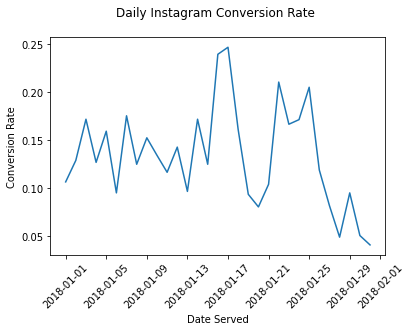

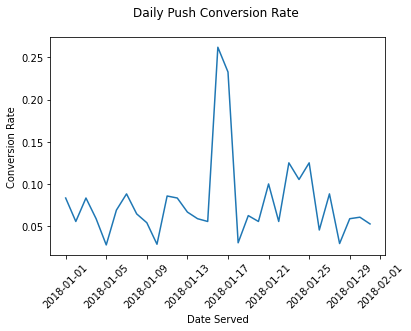

In [55]:
# Visualizing conversion rate based on marketing channel
channel_conv = conversion_rate(marketing, ['date_served','marketing_channel'])
channel_conv_df = pd.DataFrame(channel_conv.unstack(level=1))
plotting(channel_conv_df)

There was drop in the House Ads channel conversion rate around January 11th:

In [56]:
channel_conv_df.loc['2018-01-09':'2018-01-14','House Ads']

date_served
2018-01-09    0.127389
2018-01-10    0.124260
2018-01-11    0.038710
2018-01-12    0.027211
2018-01-13    0.040541
2018-01-14    0.039735
Name: House Ads, dtype: float64

Findings:
* peak in conversion rates around Jan 15th, make considering more ads were sent out at that particular date
*  email conversion rate showed many peak typically because emails are sent in bulk
* house ads conversion rate dropped around Jan 11th

## Analyzing House Ads Conversion Rate

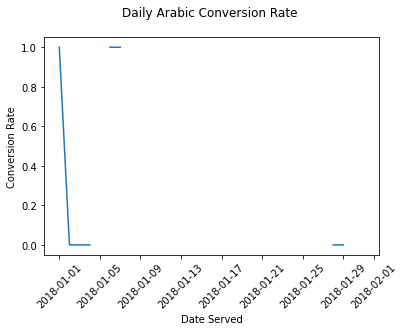

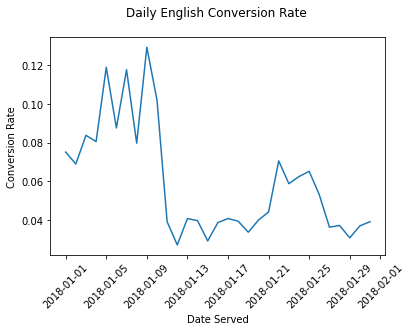

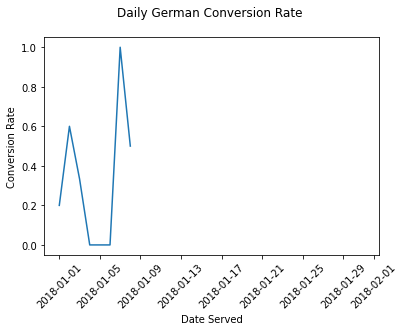

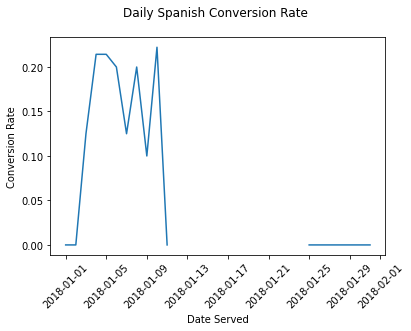

In [57]:
# Isolate the rows where marketing channel is House Ads
house_ads = marketing[marketing['marketing_channel']=='House Ads']

# Calculate conversion rate of house ads by date served and language displayed
house_ads_conv_lang = conversion_rate(house_ads,['date_served','language_displayed'])

# Unstack conv_lang_channel
house_ads_conv_lang_df = pd.DataFrame(house_ads_conv_lang.unstack(level=1))

# Use your plotting function to display results
plotting(house_ads_conv_lang_df)

Findings:
* In languages other than english there were many days where no campaign was sent out particularly after January 11th

Further investigate:
* Correct language on house ads

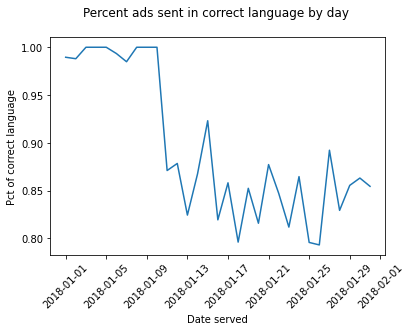

In [58]:
# Plotting percentage of campaign ads with correct language per day

# Groupby date_served and correct_language
language_check = house_ads.groupby(['date_served','is_correct_lang'])['is_correct_lang'].count()

# Unstack language_check and fill missing values with 0's
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)

# Divide the count where language is correct by the row sum
language_check_df['pct'] = language_check_df['Yes']/language_check_df.sum(axis=1)

# Plot results
plt.plot(language_check_df.index.values, language_check_df['pct'])
plt.title('Percent ads sent in correct language by day \n')
plt.xlabel('Date served')
plt.ylabel('Pct of correct language')
plt.xticks(rotation=45)
plt.show()

Findings:
* Number of House Ads sent out with correct language dropped since Jan 11th, likely the cause for dropping conversion rate

### Assessing impact due to campaign error

In [59]:
# Calculate conversion rate before language bug happened
house_ads_bug = house_ads[house_ads['date_served'] < '2018-01-11']
lang_conv = conversion_rate(house_ads_bug,['language_displayed'])

print(lang_conv,'\n')

# Index other languages conversion rate to English
spanish_index = lang_conv['Spanish']/lang_conv['English']
arabic_index = lang_conv['Arabic']/lang_conv['English']
german_index = lang_conv['German']/lang_conv['English']

print("Index conversion Spanish terhadap English:", spanish_index)
print("Index conversion Arabic terhadap English:", arabic_index)
print("Index conversion German terhadap English:", german_index)

language_displayed
Arabic     0.500000
English    0.099093
German     0.444444
Spanish    0.166667
Name: user_id, dtype: float64 

Index conversion Spanish terhadap English: 1.681924882629108
Index conversion Arabic terhadap English: 5.045774647887324
Index conversion German terhadap English: 4.485133020344287


Read:
for every 1 conversion from House Ads in English, occur:
- 1.7 conversion from house ads in Spanish
- 5 conversion from house ads in Arabic
- 4.5 conversion from house ads in German


In [60]:
# Create table of daily total reaches and converted from house ads, based on language preferred
converted = house_ads.groupby(['date_served','language_preferred'])\
                        .agg({'user_id':'nunique',
                              'converted':'sum'}) 

# Unstack converted
converted_df = pd.DataFrame(converted.unstack(level=1))

converted_df.head()

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             2.0   171.0    5.0    11.0         2      13      1   
2018-01-02             3.0   200.0    5.0    10.0         0      14      3   
2018-01-03             2.0   179.0    3.0     8.0         0      15      1   
2018-01-04             2.0   149.0    2.0    14.0         0      12      0   
2018-01-05             NaN   143.0    1.0    14.0       NaN      17  False   

                            
language_preferred Spanish  
date_served                 
2018-01-01               0  
2018-01-02               0  
2018-01-03               1  
2018-01-04               3  
2018-01-05               3

In [61]:
# Create new column of English conversion rate after bug
converted_df['english_conv_rate'] = converted_df.loc['2018-01-11':'2018-01-31'][('converted','English')]

# Calculate expected conversion rates for language other than English
converted_df['expected_spanish_rate'] = spanish_index*converted_df['english_conv_rate']
converted_df['expected_arabic_rate'] = arabic_index*converted_df['english_conv_rate']
converted_df['expected_german_rate'] = german_index*converted_df['english_conv_rate']

# Calculate expected number of conversion for language other than English
converted_df['expected_spanish_conv'] = converted_df['expected_spanish_rate']*converted_df[('user_id','Spanish')]/100
converted_df['expected_arabic_conv'] = converted_df['expected_arabic_rate']*converted_df[('user_id','Arabic')]/100
converted_df['expected_german_conv'] = converted_df['expected_german_rate']*converted_df[('user_id','German')]/100

# Check the newly engineered dataframe
converted_df.loc['2018-01-10':'2018-01-20']

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-10             NaN   147.0    4.0    18.0       NaN      15      2   
2018-01-11             7.0   133.0    2.0    13.0         0       6      0   
2018-01-12             3.0   129.0    4.0    11.0         0       3      0   
2018-01-13             6.0   121.0    5.0    16.0         0       5      1   
2018-01-14             5.0   131.0    3.0    12.0         0       6      0   
2018-01-15             2.0   189.0    4.0    10.0         0       6      0   
2018-01-16             7.0   127.0    4.0    17.0         0       6      0   
2018-01-17             2.0   126.0    3.0    16.0         0       2      0   
2018-01-18             7.0   121.0    6.0    18.0         0       5      1   
2018-01-19             5.0   126.0    5.0    12.0         1       4      0   
2018-01-20             6.0   124.0    6.0    14.0         1       4      1   

                           english_conv_rate expected_spanish_rate  \
language_preferred Spanish                                           
date_served                                                          
2018-01-10               4               NaN                   NaN   
2018-01-11               0                 6             10.091549   
2018-01-12               1                 3              5.045775   
2018-01-13               0                 5              8.409624   
2018-01-14               0                 6             10.091549   
2018-01-15               0                 6             10.091549   
2018-01-16               0                 6             10.091549   
2018-01-17               4                 2               3.36385   
2018-01-18               0                 5              8.409624   
2018-01-19               0                 4                6.7277   
2018-01-20               0                 4                6.7277   

                   expected_arabic_rate expected_german_rate  \
language_preferred                                             
date_served                                                    
2018-01-10                          NaN                  NaN   
2018-01-11                    30.274648            26.910798   
2018-01-12                    15.137324            13.455399   
2018-01-13                    25.228873            22.425665   
2018-01-14                    30.274648            26.910798   
2018-01-15                    30.274648            26.910798   
2018-01-16                    30.274648            26.910798   
2018-01-17                    10.091549             8.970266   
2018-01-18                    25.228873            22.425665   
2018-01-19                    20.183099            17.940532   
2018-01-20                    20.183099            17.940532   

                   expected_spanish_conv expected_arabic_conv  \
language_preferred                                              
date_served                                                     
2018-01-10                           NaN                  NaN   
2018-01-11                      1.311901             2.119225   
2018-01-12                      0.555035              0.45412   
2018-01-13                       1.34554             1.513732   
2018-01-14                      1.210986             1.513732   
2018-01-15                      1.009155             0.605493   
2018-01-16                      1.715563             2.119225   
2018-01-17                      0.538216             0.201831   
2018-01-18                      1.513732             1.766021   
2018-01-19                      0.807324             1.009155   
2018-01-20                      0.941878             1.210986   

                   expected_german_conv  
language_preferred                       
date_served                              
2018-01-10 

In [62]:
# Subset relevant data: after bug
converted_impact = converted_df.loc['2018-01-11':'2018-01-31']

# Calculate expected subscribers 
expected_subs = converted_impact['expected_spanish_conv'].sum() + converted_impact['expected_arabic_conv'].sum() + converted_impact['expected_german_conv'].sum()

# Calculate actual subscribers
actual_subs = converted_impact[('converted','Spanish')].sum() + converted_impact[('converted','Arabic')].sum() + converted_impact[('converted','German')].sum()

# Calculate lost subs due to bug
lost_subs = expected_subs-actual_subs
print('Estimated subscribers lost due to the bug:', round(lost_subs))

Estimated subscribers lost due to the bug: 32


Recommendation:
1. Company should pay attention to the languages the ads were send in since it is proven to be a factor in the conversion rate.

## A/B Testing

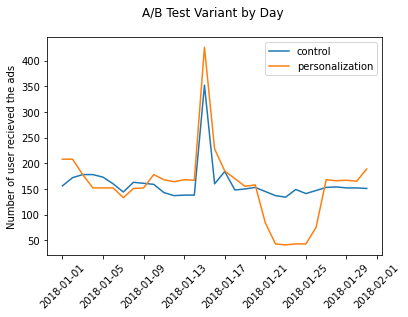

In [63]:
# Plotting variant by day
ab_test = marketing.groupby(['date_served','variant'])['user_id'].nunique()
ab_test_df = pd.DataFrame(ab_test.unstack(level=1))

plt.plot(ab_test_df.index.values,ab_test_df['control'])
plt.plot(ab_test_df.index.values,ab_test_df['personalization'])
plt.title('A/B Test Variant by Day \n')
plt.legend(ab_test_df.columns)
plt.xticks(rotation=45)
plt.ylabel('Number of user recieved the ads')
plt.show()

Number of personalized ads sent dropped at around 21-26th. If we recall from previous findings, daily reaches drop around January 21th until the 26th. However, the conversion rates are relatively higher at this period.


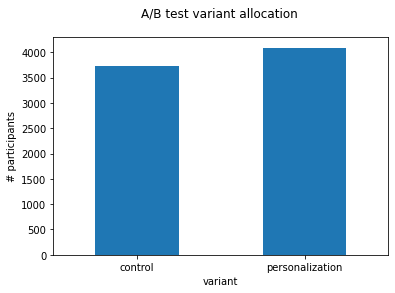

In [64]:
# Check test allocation 

# Group the email DataFrame by variant 
alloc = marketing.groupby('variant')['user_id'].nunique()

# Plot a bar chart of the test allocation
alloc.plot(kind='bar')
plt.title('A/B test variant allocation \n')
plt.ylabel('# participants')
plt.xticks(rotation=0)
plt.show()

### A/B Test Result by Age Group

variant       control  personalization
age_group                             
0-18 years   0.081772         0.230892
19-24 years  0.083475         0.341823
24-30 years  0.086176         0.269231
30-36 years  0.095668         0.049213
36-45 years  0.090580         0.049213
45-55 years  0.090580         0.051181
55+ years    0.102128         0.056311 



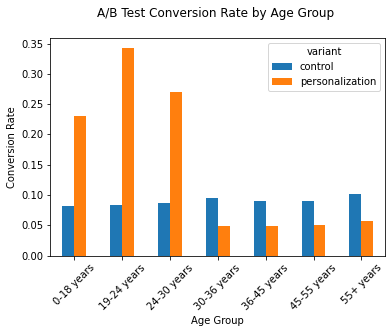

In [65]:
#Check conversion rate for each allocation in each age group

ab_age_conv = conversion_rate(marketing,['age_group','variant'])
ab_age_conv_df = pd.DataFrame(ab_age_conv.unstack(level=1))
print(ab_age_conv_df, '\n')

ab_age_conv_df.plot(kind='bar')
plt.title('A/B Test Conversion Rate by Age Group \n')
plt.ylabel('Conversion Rate')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.show()

Younger people (up to 30 yrs) convert more from personalized ads.

In [66]:
# Check overall conversion rate from the test (for each allocation)

# Group marketing by user_id and variant
subscribers = marketing.groupby(['user_id', 
                             'variant'])['converted'].max()
subscribers_df = pd.DataFrame(subscribers.unstack(level=1)) 

# Drop missing values from the control column
control = subscribers_df['control'].dropna()

# Drop missing values from the personalization column
personalization = subscribers_df['personalization'].dropna()

print('Control conversion rate:', control.mean())
print('Personalization conversion rate:', personalization.mean())

Control conversion rate: 0.09287257019438445
Personalization conversion rate: 0.16801173881144535


The number from personalized is visually higher, but higher by how much? We answer this by calculating the 'lift'.

lift = ((treatment conv rate) - (control conv rate))/(control conv rate)

In [67]:
# Lift
def lift(a,b):
    # Calcuate the mean of a and b
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    
    # Calculate the lift using a_mean and b_mean
    lift = (b_mean-a_mean)/a_mean
  
    return str(round(lift*100, 2)) + '%'
  
# Print lift() with control and personalization as inputs
print('The lift is:', lift(control, personalization))

The lift is: 80.91%


### Statistical significance: t-test 

T-test is done to understand whether a test showed a positive result by chance or if it is reflective of a true difference between the variants. Is the difference between the control and personalization statistically significant?

In [68]:
# Import library
from scipy.stats import ttest_ind

# Run t-tets
t = ttest_ind(control, personalization)

print(t)

Ttest_indResult(statistic=-9.836033867623334, pvalue=1.0673641640714418e-22)


With p value smaller than 0.05 (5% significance level), the result therefore is statistically significant:

Personalized ads in overal give better conversion rate than the control ones.

### A/B testing result for each marketing channel

In [69]:
for channel in np.unique(marketing['marketing_channel'].dropna().values):
  print(channel)

  channel_data = marketing[marketing['marketing_channel'] == channel]

  subscribers = channel_data.groupby(['user_id','variant'])['converted'].max()

  subscribers = pd.DataFrame(subscribers.unstack(level=1))

  control = subscribers['control'].dropna()
  personalization = subscribers['personalization'].dropna()

  print('lift:', lift(control,personalization)) #lift function shoud be defined prior to this
  print('t-statistics:', ttest_ind(control,personalization), '\n\n' )

Email
lift: 38.85%
t-statistics: Ttest_indResult(statistic=-2.7343299447505074, pvalue=0.006451487844694175) 


Facebook
lift: 249.94%
t-statistics: Ttest_indResult(statistic=-8.832725626815982, pvalue=2.3838113167820537e-18) 


House Ads
lift: -21.76%
t-statistics: Ttest_indResult(statistic=2.180919186665876, pvalue=0.0292473385789305) 


Instagram
lift: 379.56%
t-statistics: Ttest_indResult(statistic=-10.74963558513631, pvalue=3.6595188397707697e-26) 


Push
lift: 351.07%
t-statistics: Ttest_indResult(statistic=-5.770631208333074, pvalue=1.0587609049664107e-08) 




When looking at the A/B result bt marketing channel, we see that: 

1. Personalized ads give better performance than the control ones in all marketing channel except House Ads. 
2. Personalized ads give much better results in one channel than the other. Based on the lift, personalized ads give better result when used in  Instagram, then Push, then Facebook, then lastly Email in descending order. 



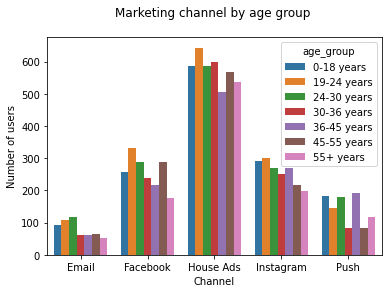

In [110]:
# Import seaborn library
import seaborn as sns

# Visualize marketing channel by age group
channel_by_age = marketing.groupby(['marketing_channel','age_group'])['user_id'].nunique()

channel_by_age_df = pd.DataFrame(channel_by_age.unstack(level=1))
channel_by_age_df.reset_index(inplace=True)
channel_by_age_df = channel_by_age_df[['marketing_channel','0-18 years','19-24 years',
                                       '24-30 years','30-36 years','36-45 years','45-55 years',
                                       '55+ years']].melt('marketing_channel')
fig, ax = plt.subplots()
sns.barplot(x='marketing_channel', y='value', hue='age_group', data=channel_by_age_df, ax=ax)
plt.title('Marketing channel by age group \n')
plt.xlabel('Channel')
plt.ylabel('Number of users')
plt.show()

Based on the visualization above, House Ads have more users(viewers) than any other channel for each group. Despite this, house ads still give negative lift for the personalized ads.

Recommendation:
1. Company doesnt have to invest more to personalize ads on website (house ads) 
2. Company should continue and improve the personalization of ads in Facebook, Instagram, and Push that is the channels with high lift for the personalized ad.